# Age of the Earth and Plate Tectonics

IN THE SPACE BELOW, WRITE OUT IN FULL AND THEN SIGN THE HONOR PLEDGE:

“I pledge my honor that I have not violated the honor code during this examination.”

**PRINT NAME**: 

If a fellow student has contributed significantly to this work, please acknowledge them here:

**Peer(s)**:                          

*Contribution:*


By uploading this assignment through Canvas, I sign off on the document below electronically.

----

## Downloads from the Internet 

We will need some files from the internet that will be used in this assignment. If you get errors in the following cell block, it probably means the machine (or the node in a cluster) you are calling this command from does not have direct internet access.

**Note**: If you are on the Adroit cluster in Princeton, please make sure you are within a *Jupyter on Adroit Vis* session since this node has internet access. You can use any other session for the remaining cells in this notebook; *Jupyter for classes* is suggested since a dedicated class environment (GEO203) with all necessary modules has been created for this course.

In [ ]:
import os
import requests

# Define the list of remote files to retrieve\n",
remote_urls = ['https://portal.globalseismology.org/files/DATA/GLOBALTOPO/ETOPO1_Ice_g_gmt4.grd']

# loop through all remote URL and download the files
for remote_url in remote_urls:
    # Define the local filename to save data
    # get the trailing filename after the last / of the path
    local_file = os.path.basename(remote_url)

    # Download remote and save locally
    r = requests.get(remote_url, allow_redirects=True)
    open("Files/"+local_file, 'wb').write(r.content)

----
## Part I: Age of the Earth

In this question, you will be carrying out a famous set of geochronological calculations by Patterson (1956) - the first correct age of the Earth. Read Patterson (1956). This paper is commonly cited as the first correct determination of the age of the Earth (estimates now are about 4.567 Ga).

![A picture of Claire Patterson](Photos/CPatterson.jpeg)

Image: Claire Patterson (Credit: Caltech Archives)

![A thumbnail picture of Patterson 1956 paper](Photos/Patterson+56_Thumbnail.png)

Image: The first page from Patterson (1956) paper.

### Mini-tutorial

 - **Opening text (*.txt) files with pandas**
 - **Basic curve fitting with numpy**
 - **Basic scatter and line plots with matplotlib**

You will need to use the Python programming language for problems that require computations and for making plots in this class. 

Here is an example of fitting some data and making a plot. We will read a data file, perform linear regression, and make a plot. Most of the time, your code will begin by importing libraries such as `numpy` (for vector calculation), `pandas` (for reading tables and other files), and `matplotlib.pyplot` (for making plots). If you are not familar with these libraries, feel free to follow examples in the previous precepts or the tutorial online for [numpy](https://www.w3schools.com/python/numpy/default.asp) and [matplotlib](https://matplotlib.org/stable/tutorials/index.html).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title">Python Review</p>
<p>Reading columnar data with Pandas: Note the line `table = pd.read_table("example-data.txt")`; is how you read a data file into a Pandas DataFrame, which is a 2 dimensional data structure, like a 2 dimensional array or a table with rows and columns.</p>
</div>

First, let us create an example dataset that will be used in the curve fitting exercise. The basic form of a line is `y=m*x+b` where `m` is the slope and `b` is the intercept of the line on the y-axis. We are adding a bit of noise from a normal distribution to make numpy work a bit harder! We will check later if the fitted values numpy gives for `m` and `b` are similar to what we started off with `y = 5x + 3.5 + random noise`. Data are saved to a text file `example-data.txt` with columns for `x` and `y`. We are going to read this file and fit a straight line.

In [2]:
# pandas read_table allows you to read a table of any structure
# useful when you are not sure how to read the file
table = pd.read_table("Files/example-data.txt")

# displays the table we have just read
table

x        y
0    5.553   22.818
1    6.735   39.294
2    7.780   48.010
3   10.542   64.029
4   10.870   54.845
5   11.499   48.524
6   16.689   87.874
7   19.600  114.331
8   20.703  101.660
9   22.550  121.006
10  23.762  120.815
11  24.092  123.064

In [3]:
# access a column of the table by using column's header as a key
table['x']

0      5.553
1      6.735
2      7.780
3     10.542
4     10.870
5     11.499
6     16.689
7     19.600
8     20.703
9     22.550
10    23.762
11    24.092
Name: x, dtype: float64

<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title">Python Review</p>
<p>Note the line `p = np.polyfit(x, y, 1)`. This is where we fit the line. The value `1` indicates that we fit a first-order polynomial.</p>
</div>

In [4]:
# One example on how to fit a line using numpy polyfit
x = np.array(table['x'])
y = np.array(table['y'])

p = np.polyfit(x, y, 1)

# y-value of the best-fitted line
y_fit = p[0] * x + p[1]

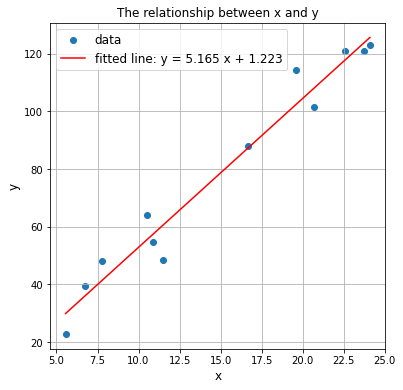

In [5]:
# Basic steps on how to make a plot using matplotlib

# creates a figure
fig = plt.figure(figsize=[6,6])

# makes a scatter plot
plt.scatter(x, y, label='data')

# makes a line plot
text = "fitted line: y = %.3f x + %.3f"%(p[0], p[1])
plt.plot(x, y_fit, 'r', label=text)

# labels the axes 
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('The relationship between x and y', fontsize=12)

# adds grid lines
plt.grid()

# adds a legend box
plt.legend(fontsize=12)

# shows the figure
plt.show()

**Note**: The value numpy calculated for `m` (5.165) and `b` (1.223) was slightly different from what we started with (5 and 3.5).

### TO DO

**Question 1.1**. Using the data in Table 1 from that paper (this is also saved as the uploaded file PS1-data.txt), find the slope in Equation 1 from the Patterson paper. Choose the appropriate data to make a scatter plot with a fitted line like in the mini-tutorial and show your code and a plot. 

If you do not know which data you need to choose, think about what could be the slope in the Equation 1. Report the slope of the fitted line a the variable `fit_slope` below.

**Answer**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# pandas read_table allows you to read a table of any structure
# useful when you are not sure how to read the file
table = pd.read_table("Files/PS1-data.txt")

# displays the table we have just read
table

206/204  207/204  208/204 Unnamed: 3
0    50.28    34.86    67.97     Mexico
1    19.27    15.95    39.05       Iowa
2    19.48    15.76    38.21     Kansas
3     9.55    10.38    29.54  Australia
4     9.46    10.34    29.44    Arizona

<div style="color:red">
    From Equation (1)
    </div>

<div style="color:red">
\begin{equation}
\frac{R_{1a} - R_{1b}}{R_{2a} - R_{2b}} = \frac{e^{\lambda_{235} T} - 1}{k (e^{\lambda_{238} T} - 1)}
\end{equation}
where $R_1 =\ ^{207}\text{Pb}\ /\ ^{204}\text{Pb}$ and $R_2 =\ ^{206}\text{Pb}\ /\ ^{204}\text{Pb}$.
    </div>

<div style="color:red">
    You notice that the left-hand side is the slope of the line going through two points of $(x,y) = (^{206}\text{Pb}\ /\ ^{204}\text{Pb}, ^{207}\text{Pb}\ /\ ^{204}\text{Pb})$
    </div>

In [10]:
# One example on how to fit a line using numpy polyfit
x = np.array(table['206/204'])
y = np.array(table['207/204'])

p = np.polyfit(x, y, 1)

# y-value of the best-fitted line
y_fit = p[0] * x + p[1]

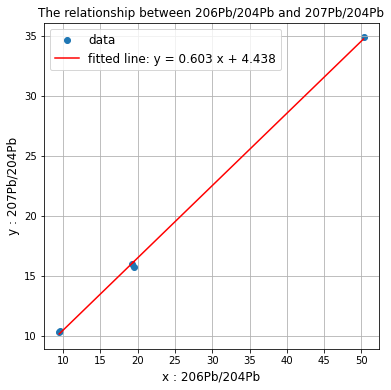

In [11]:
# Basic steps on how to make a plot using matplotlib

# creates a figure
fig = plt.figure(figsize=[6,6])

# makes a scatter plot
plt.scatter(x, y, label='data')

# makes a line plot
text = "fitted line: y = %.3f x + %.3f"%(p[0], p[1])
plt.plot(x, y_fit, 'r', label=text)

# labels the axes 
plt.xlabel('x : 206Pb/204Pb', fontsize=12)
plt.ylabel('y : 207Pb/204Pb', fontsize=12)
plt.title('The relationship between 206Pb/204Pb and 207Pb/204Pb', fontsize=12)

# adds grid lines
plt.grid()

# adds a legend box
plt.legend(fontsize=12)

# shows the figure
plt.show()

In [12]:
# Fill slope you have found from the data here
fit_slope = 0.603

**Question 1.2**. Recalculate Patterson’s age of the Earth based on the slope. You will need to use the `fit_slope` obtained in Question 1.1. You should also use the same values as Patterson did for $\lambda_{238}$, $\lambda_{235}$ (from Patterson (1956) paper, equation (1)), and present day $\frac{^{238}\text{U}}{^{235}\text{U}}$.


In [1]:
# The values Patterson used for the calculation
lambda_235 = 9.72e-10      # Decay constant of U-235 in yr^-1
lambda_238 = 1.537e-10     # Decay constant of U-238 in yr^-1
k = 137.8                  # U-238 / U-235 today

You may use this piece of code below to determine the age of Earth. Here we are finding the age of the Earth where the Equation 1 from the Patterson (1956) is satisfied for the slope you have found from the data.

In [13]:
from scipy import optimize

def get_difference(age, reference_slope):
    '''
    Compute the difference of the right-hand side and the left-hand side of Equation 1 from Patterson (1956)
    
    Input Parameters:
    ----------------
    
    age:               age of the Earth in years
    reference_slope:   the slope obtained from fitting the data
    
    Return:
    ------
    
    difference:        difference of the right-hand side and the left-hand side of Equation 1 from Patterson (1956)
    
    '''
    lambda_235 = 9.72e-10     # Decay constant of U-235 in yr^-1
    lambda_238 = 1.537e-10    # Decay constant of U-235 in yr^-1
    k = 137.8                 # U-238 / U-235 today
    difference = (np.exp(lambda_235*age) - 1) / (k * (np.exp(lambda_238*age) - 1)) - reference_slope
    return difference

In [14]:
# Set these parameter to appropriate values ONLY when the age of the Earth makes no sense (e.g. -5 years)
age_lower = 1e1       # The lower bound for the bracket (unit: year)
age_upper = 14e9      # The upper bound for the bracket (unit: year)

# Determine the age of the Earth
sol = optimize.root_scalar(get_difference, args=fit_slope, bracket=[age_lower, age_upper], method='brentq')

**Answer**:

In [15]:
# Display the age of the Earth in years
print("The Earth is %.4g years old."%sol.root)

The Earth is 4.582e+09 years old.


**Question 2**. How does Patterson justify that the age of Earth is the same as the meteorites’ ?

**Answer**:

<div style="color:red">
Patterson shows that lead isotope measurements of ocean sediment and galena from Earth 
also fall upon the same isochron defined by the meteorites. He asserts that the simplest 
explanation for this agreement is that both Earth and the meteorites were formed at the same 
time from the same “primordial lead.” Essentially, Earth is one more big meteorite that falls 
on the same isochron. 
</div>

**Question 3**. What are the three assumptions that need to be met in order for an isochron to be meaningful? Do you think this is met for Patterson’s meteorites? (You may answer this qualitatively.)

**Answer**:

<div style="color:red">
The three assumptions are
    <li> All samples are the same age. </li>
    <li> All samples have the same initial composition of the daughter isotope (e.g., 207Pb/204Pb, 206Pb/204Pb, 87Sr/86Sr, etc.). </li>
    <li> The chemical evolution of the samples took place in a closed system. That is, no parent (e.g., 235U or 238U) or daughter (e.g., 207Pb or 206Pb) isotopes have been added or lost from the samples between the time of formation and the present day. The amount of parent and daughter isotopes within the samples have only changed due to radioactive decay.  </li>
<br> 
    The main line of evidence here is that the data fall along a line in isochron space. If any of the above assumptions were to be violated, the data would fall off of the isochron line. Additionally, since Patterson uses lead-lead dating, which uses two different decay systems (235U $\rightarrow$ 207Pb & 238U $\rightarrow$ 206Pb), we have even stronger evidence that none of the above assumptions are violated.
    </div>


----

## Part II: Plate Tectonics

The theory of plate tectonics posits that the Earth’s lithosphere (crust and upper mantle) is broken into a number of jigsaw puzzle-like plates which move relative to one another over a plastically-deforming (but still solid) asthenosphere (and mid and lower mantle). The boundaries between plates are narrow zones marked by a variety of topographic and tectonic features, and there is significantly less (but still some) tectonic activity in the interior of plates.

You will be exploring some of the evidence on which plate tectonics is based, and analyze data that are used to interpret plate tectonic processes. 
 
### Topography of the continents and bathymetry of the sea floor 

We are all relatively familiar with the topography of the Earth’s surface above sea level, but less so with the bathymetry of Earth’s surface below the sea level. Before this bathymetry was known, most people assumed that the sea floor was relatively flat and featureless, and personal experience with lakes and rivers suggested that the deepest part would be in the middle.

Actual mapping of the sea floor, however, revealed some surprises.  Such mapping began in the 1930’s but accelerated during World War II with the advent of submarine warfare. Princeton Geosciences Professor Harry Hess played a pivotal role; as captain of the USS Cape Johnson, he used the ship’s echo sounder to "ping" the seafloor and measure depth profiles as the transport ship traversed the Pacific Ocean. After the war, this data led him to propose the process of seafloor spreading, a hypothesis crucial to the development of the theory of plate tectonics.

![Harry Hess](Photos/Harry_Hess.jpeg)

**Image**: Harry Hess with a blackboard

![USS Cape Johnson](Photos/USS_Cape_Johnson.jpeg)

**Image**: USS Cape Johnson

Modern methods to measure bathymetry include
- Multi-beam echo sounders that map a wide swath of the seafloor.
- Satellite measurement of variations in sea level due to variations in gravitational pull over bathymetric features  – sea level is slightly lower over low spots on the sea floor and slightly higher over high spots.

![Bla](Photos/SFM_systems.jpeg)

**Image**: Various methods of seafloor measurements made onboard a ship

![Bla](Photos/Mapping_the_ocean_floor_pillars.jpeg)

**Image**: Satellite measurements of variation in sea level due to variations in gravitational pull over bathymetric features

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


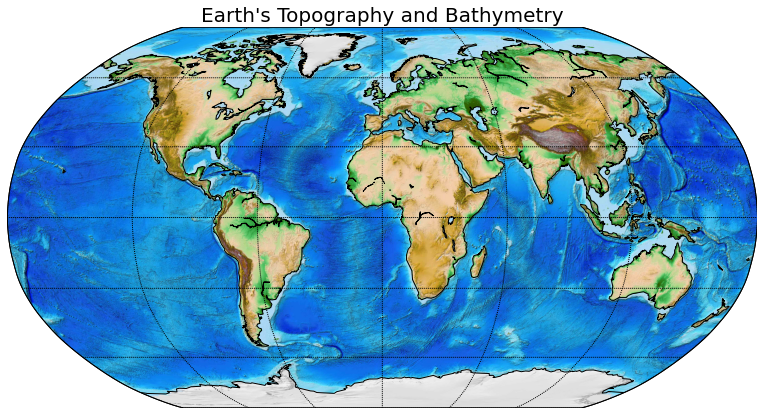

In [1]:
import os
os.environ['PROJ_LIB'] = os.path.join(os.environ['CONDA_PREFIX'],'share/proj') # This is required for Basemap plotting to work

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[14, 7])
# lon_0 is central longitude of projection.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawcoastlines()
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,90.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
m.drawmapboundary()
m.etopo()
plt.title("Earth's Topography and Bathymetry",fontsize=20)
plt.show()

Image: topographic map of Earth

### Mini-tutorial

 - **Opening netCDF files with xarray**
 - **Makeing a topographic map**
 - **Ploting a topographic cross-section**
 - **Finding the maximum and minimum values in 2D data**

We use ice sheet elevation from [ETOPO1](https://www.ngdc.noaa.gov/mgg/global/) Global Relief Model. In this tutorial, we will read a `netCDF` file using the `XArray` module and then make a topographic map of the United States and a cross-section across it. `NetCDF` (network Common Data Form) is a file format for storing multidimensional scientific data (variables) such as temperature, humidity, and pressure. Feel free to use the codes from this tutorial to plot the topography within region you are curious about. 

**Note**: Plotting the entire Earth may cause the Python kernel to die! Hogs too much memory! If you want to look at the global map, please look at the image above or the physical map in the precept room.

In [17]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Read ETOPO1 topography data file
ds = xr.open_dataset('Files/ETOPO1_Ice_g_gmt4.grd')

# Display the content
ds

<xarray.Dataset>
Dimensions:  (x: 21601, y: 10801)
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1_Ice_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0

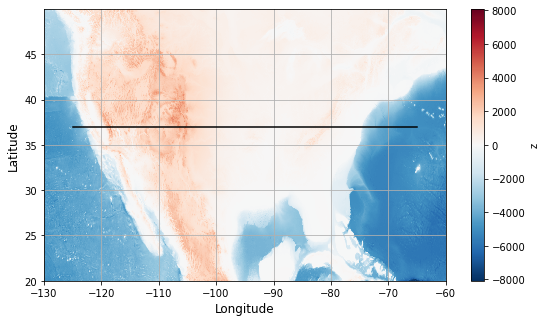

In [19]:
# Plotting the topographic map of the United States
# WARNING: Plotting the entire Earth may cause the kernel to die

min_lon = -130     # left-boarder of the map
max_lon = -60      # right-boarder of the map
min_lat = 20       # lower-boarder of the map
max_lat = 50       # upper-boarder of the map
fig = plt.figure(figsize=[9,5])
obj = ds.z.sel(x=slice(min_lon, max_lon),y=slice(min_lat, max_lat)).plot()
# a line representing the cross-section in the next figure
plt.plot([-125, -65], [37, 37], 'k')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()

/opt/export/course/geo203/anaconda3/envs/fall2022/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


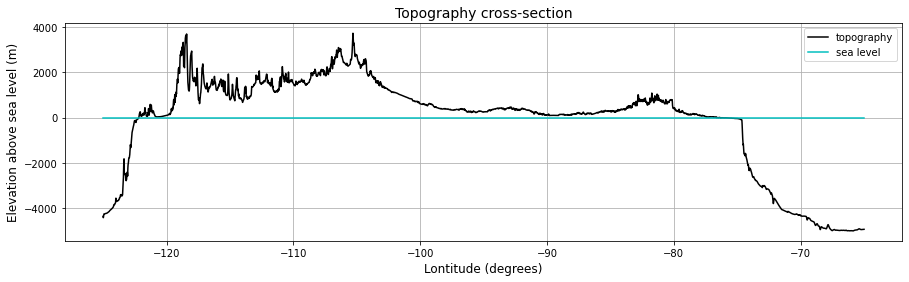

In [20]:
# Plotting a cross-section
plt.figure(figsize=[15,4])
ds_slice = ds.sel(y=37, method="nearest").sel(x=slice(-125,-65))
plt.plot(ds_slice['x'], ds_slice['z'], 'k', label='topography')
plt.plot([min(ds_slice['x']), max(ds_slice['x'])], [0, 0], 'c', label='sea level')
plt.grid()
plt.xlabel('Lontitude (degrees)', fontsize = 12)
plt.ylabel('Elevation above sea level (m)', fontsize = 12)
plt.title('Topography cross-section', fontsize=14)
plt.legend()
plt.show()

In [21]:
# Here is an example on how to determine the location of the highest and lowest points in the United States map
# Don't be surprised when you notice that the lowest point is outside the US
ds_usa = ds.sel(x=slice(-130, -60),y=slice(20, 50))

# min/max elevation
ds_max = ds_usa.where(ds_usa==ds_usa.max(), drop=True).squeeze()
ds_min = ds_usa.where(ds_usa==ds_usa.min(), drop=True).squeeze()

z_min = ds_min.z.data.item()
z_max = ds_max.z.data.item()

# finding the location of the min/max elevation point
lon_min = ds_min.x.data.item()
lat_min = ds_min.y.data.item()
lon_max = ds_max.x.data.item()
lat_max = ds_max.y.data.item()

print("The lowest point is at (lon, lat) = (%.2f, %.2f) and %.2f m below sea level."%(lon_min, lat_min, abs(z_min) ))
print("The highest point is at (lon, lat) = (%.2f, %.2f) and %.2f m above sea level."%(lon_max, lat_max, z_max))

The lowest point is at (lon, lat) = (-65.45, 20.00) and 8081.00 m below sea level.
The highest point is at (lon, lat) = (-121.77, 46.85) and 4161.00 m above sea level.


### TO DO

**Question 4.1** Checkout the topographic map above and focus on the Atlantic Ocean between North/South America and Eurasia/Africa using the tools discussed above. Note that the deepest part is not in the middle; instead there is an underwater mountain range that runs down the middle of the ocean.  This is termed an ocean ridge or spreading ridge (more on spreading later). Note that while the ridge is a topographic high, it also has a valley (the "rift valley") in the middle. Also look at the ocean ridges in the Indian, Pacific and Southern Oceans.

About how high does the mid-Atlantic ridge rise above the deep part of the Atlantic Ocean floor? Please make a cross-section plot of the bathymetry building on the tools provided above.

**Answer**:

<div style="color:red">
Atlantic Ocean floor is something like 2km deeper than the Mid-Atlantic Ridge. (The mid-ocean ridge system is analogous to the height above sea level of the Appalachians, but not as high as the Rockies or the Himalayas.)
</div>
<div style="color:red">
    <b>Note</b>: The topographic map and the cross-section below is just an example. You can make any cross-section as long as it cut across the mid-Adlantic ridge.
</div>

In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Read ETOPO1 topography data file
ds = xr.open_dataset('Files/ETOPO1_Ice_g_gmt4.grd')

# Display the content
ds

<xarray.Dataset>
Dimensions:  (x: 21601, y: 10801)
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1_Ice_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0

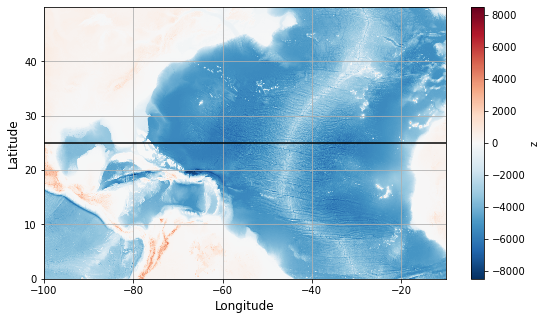

In [24]:
# Plotting the topographic map of the United States
# WARNING: Plotting the entire Earth may cause the kernel to die

min_lon = -100     # left-boarder of the map
max_lon = -10      # right-boarder of the map
min_lat = 0       # lower-boarder of the map
max_lat = 50       # upper-boarder of the map
fig = plt.figure(figsize=[9,5])
obj = ds.z.sel(x=slice(min_lon, max_lon),y=slice(min_lat, max_lat)).plot()
# a line representing the cross-section in the next figure
plt.plot([-100, -10], [25, 25], 'k')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()

/opt/export/course/geo203/anaconda3/envs/fall2022/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


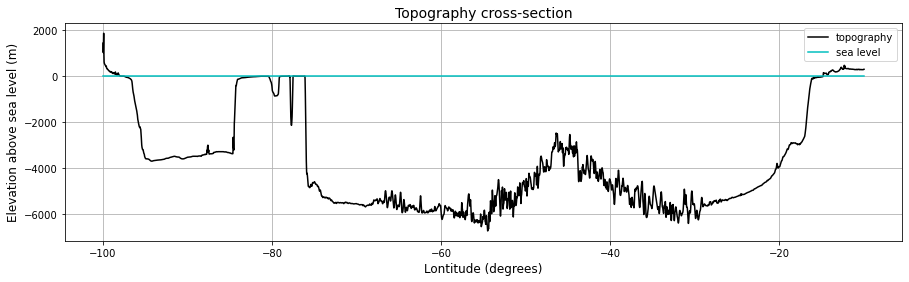

In [25]:
# Plotting a cross-section
plt.figure(figsize=[15,4])
ds_slice = ds.sel(y=25, method="nearest").sel(x=slice(-100,-10))
plt.plot(ds_slice['x'], ds_slice['z'], 'k', label='topography')
plt.plot([min(ds_slice['x']), max(ds_slice['x'])], [0, 0], 'c', label='sea level')
plt.grid()
plt.xlabel('Lontitude (degrees)', fontsize = 12)
plt.ylabel('Elevation above sea level (m)', fontsize = 12)
plt.title('Topography cross-section', fontsize=14)
plt.legend()
plt.show()

    
**Question 4.2** A "mid-ocean" ridge isn’t always in the middle of the ocean. Describe the position of the ridge in the Pacific Ocean called the "East Pacific Rise." Please include a cross-section plot of the relevant portion of the Pacific Ocean to support the description.

**Answer**:

<div style="color:red">
    <p> The East Pacific Rise runs from the Gulf of California (about 20 degrees north) to 60 degrees south and parallel to the west coast of South America. The longitude is about 110 degrees west which is in the east portion of the Pacific Ocean, not the middle. </p>
    <p> <b>Note</b>: The topographic map and the cross-section below is just an example. You can make any cross-section as long as it cut across the mid-Adlantic ridge. </p>
</div>

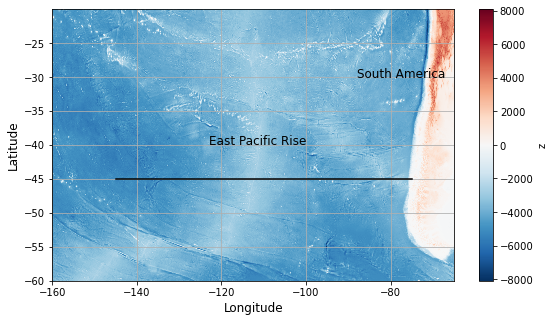

In [26]:
# Plotting the topographic map of the United States
# WARNING: Plotting the entire Earth may cause the kernel to die

min_lon = -160     # left-boarder of the map
max_lon = -65      # right-boarder of the map
min_lat = -60       # lower-boarder of the map
max_lat = -20       # upper-boarder of the map
fig = plt.figure(figsize=[9,5])
obj = ds.z.sel(x=slice(min_lon, max_lon),y=slice(min_lat, max_lat)).plot()
# a line representing the cross-section in the next figure
plt.plot([-145, -75], [-45, -45], 'k')
plt.annotate('East Pacific Rise', (-123, -40), fontsize=12)
plt.annotate('South America', (-88, -30), fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()

/opt/export/course/geo203/anaconda3/envs/fall2022/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


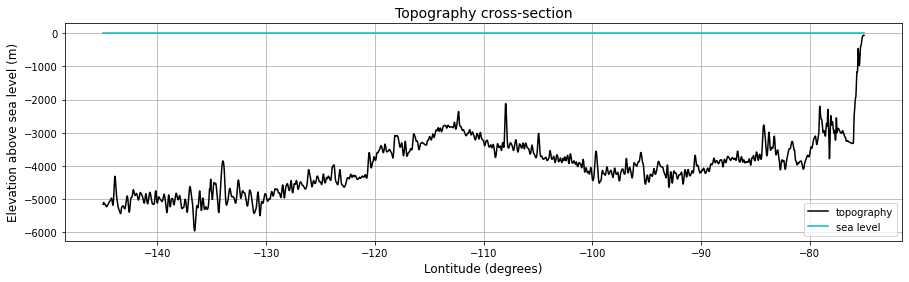

In [27]:
# Plotting a cross-section
plt.figure(figsize=[15,4])
ds_slice = ds.sel(y=-45, method="nearest").sel(x=slice(-145,-75))
plt.plot(ds_slice['x'], ds_slice['z'], 'k', label='topography')
plt.plot([min(ds_slice['x']), max(ds_slice['x'])], [0, 0], 'c', label='sea level')
plt.grid()
plt.xlabel('Lontitude (degrees)', fontsize = 12)
plt.ylabel('Elevation above sea level (m)', fontsize = 12)
plt.title('Topography cross-section', fontsize=14)
plt.legend()
plt.show()

**Question 4.3** Where is the only place where a "mid-ocean" ridge rises above sea level (hint, follow the mid-Atlantic ridge northwards)?

**Answer**:

<p style="color:red"> Iceland (The plots below are for illustration. They are not graded.) </p>

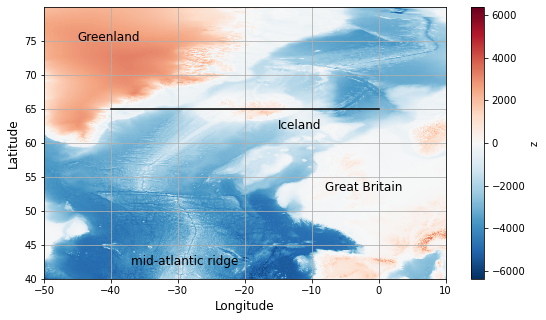

In [28]:
# Plotting the topographic map of the United States
# WARNING: Plotting the entire Earth may cause the kernel to die

min_lon = -50     # left-boarder of the map
max_lon = 10      # right-boarder of the map
min_lat = 40       # lower-boarder of the map
max_lat = 80       # upper-boarder of the map
fig = plt.figure(figsize=[9,5])
obj = ds.z.sel(x=slice(min_lon, max_lon),y=slice(min_lat, max_lat)).plot()
# a line representing the cross-section in the next figure
plt.plot([-40, 0], [65, 65], 'k')
# Text labels in the map
plt.annotate('Iceland', (-15, 62), fontsize=12)
plt.annotate('Greenland', (-45, 75), fontsize=12)
plt.annotate('Great Britain', (-8, 53), fontsize=12)
plt.annotate('mid-atlantic ridge', (-37, 42), fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid()

/opt/export/course/geo203/anaconda3/envs/fall2022/lib/python3.9/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


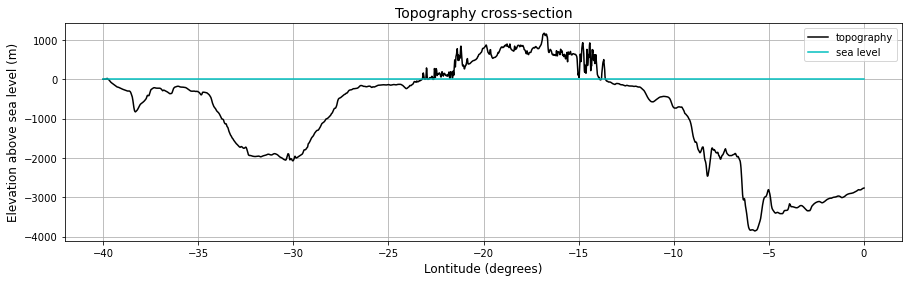

In [29]:
# Plotting a cross-section
plt.figure(figsize=[15,4])
ds_slice = ds.sel(y=65, method="nearest").sel(x=slice(-40,0))
plt.plot(ds_slice['x'], ds_slice['z'], 'k', label='topography')
plt.plot([min(ds_slice['x']), max(ds_slice['x'])], [0, 0], 'c', label='sea level')
plt.grid()
plt.xlabel('Lontitude (degrees)', fontsize = 12)
plt.ylabel('Elevation above sea level (m)', fontsize = 12)
plt.title('Topography cross-section', fontsize=14)
plt.legend()
plt.show()

**Question 5.1** If the Earth’s lowest spots aren't in the middle of the ocean, where are they? Focus on the west coast of South America and note the deep linear ocean trench about 100km off shore that runs along the length of the continent. Describe the locations of two other trench systems.

**Answer**:

<p style="color:red"> Here are a bunch, they should show two. </p>

![Trench](Photos/trenches.jpeg)

**Question 5.2** Where is the lowest point on Earth's seafloor and the highest point on Earth's land surface? What are the elevations of those points? Which is greater, the elevation of Mt. Everest above sea level or the depth of Challenger Depth below sea level. By how much in absolute and percentage terms? Does this surprise you? 

**Note**: You will have to focus on both regions with `Xarray` and then use the tools above to get the range of values. Working with the full global data will likely throw an error!

**Answer**:

In [30]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Read ETOPO1 topography data file
ds = xr.open_dataset('Files/ETOPO1_Ice_g_gmt4.grd')

# Display the content
ds

<xarray.Dataset>
Dimensions:  (x: 21601, y: 10801)
Coordinates:
  * x        (x) float64 -180.0 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0 180.0
  * y        (y) float64 -90.0 -89.98 -89.97 -89.95 ... 89.95 89.97 89.98 90.0
Data variables:
    z        (y, x) float64 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        ETOPO1_Ice_g_gmt4.grd
    GMT_version:  4.4.0
    node_offset:  0

In [32]:
# min/max elevation
ds_max = ds.where(ds==ds.max(), drop=True).squeeze()
ds_min = ds.where(ds==ds.min(), drop=True).squeeze()

z_min = ds_min.z.data.item()
z_max = ds_max.z.data.item()

# finding the location of the min/max elevation point
lon_min = ds_min.x.data.item()
lat_min = ds_min.y.data.item()
lon_max = ds_max.x.data.item()
lat_max = ds_max.y.data.item()

print("The lowest point is at (lon, lat) = (%.2f, %.2f) and %.2f m below sea level."%(lon_min, lat_min, abs(z_min) ))
print("The highest point is at (lon, lat) = (%.2f, %.2f) and %.2f m above sea level."%(lon_max, lat_max, z_max))

The lowest point is at (lon, lat) = (142.18, 11.35) and 10898.00 m below sea level.
The highest point is at (lon, lat) = (86.93, 27.98) and 8271.00 m above sea level.


<div style="color:red">
    
Mt. Everest = 8271m high.  (Official elevation is 8848m.) 
 
Challenger Deep = 10898m deep  (Official depth is 10916m.) 
 
10898-8271 = 2627m difference.    8271/10898 = 0.759  or 76% 
 
Possible ways to express (other comparisons or variations could be ok): 
 
- Challenger Deep is 2627m deeper below sea level than Mt. Everest 
is above sea level. 
 
- The height of Mount Everest is 76% of the depth of Challenger 
Deep. 
 
- Challenger Deep is 132% (1.318x) deeper below sea level than Mt. 
Everest is above sea level. 
    
</div>

----
## Part III: Seismicity

An earthquake is a vibration of Earth caused by the sudden release of energy, usually as an abrupt breaking of rock along planar fractures called faults.  An earthquake initiates at its hypocenter or focus at some depth below the land surface or sea floor. The epicenter of the earthquake is defined as the point on the Earth’s surface above where the earthquake initiated.

But only rocks that are relatively cold and brittle (the Earth’s lithosphere) can be broken in earthquakes.  Rocks that are hot and ductile (e.g. the Earth’s asthenosphere) will deform without breaking, and therefor do not produce earthquakes. By observing where earthquakes occur, both horizontally and with depth, we can learn where stress is concentrated and infer the material properties of the Earth.

In this section, we will examine the distribution of earthquakes. You will notice that most of them are near plate boundaries. Each type of plate boundaries has a unique moving pattern shown in the image below. Keep this in mind when you look at the earthquake epicenter plot later in this section.

![bla](Photos/plate_boundary_types.png)

**Image** Three types of plate boundaries.

In [2]:
import pandas as pd
import json
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
def cutoff_track(lon, lat, cutoff_lon):
    """
    Insert nan between two points that cross the cutoff lontitude. 
    Avoid horizontal line when plot the track
    
    Input Parameters:
    ----------------
    
    lon: longitude array
    lat: latitude array
    cutoff_lon: divide the curve at this cutoff longitude
    
    Return:
    ------
    
    lon, lat: updated arrays
    """
    xtrk = np.mod(lon - cutoff_lon, 360)
    is_cross = np.where(np.abs(xtrk[1:-1]-xtrk[0:-2]) > 90)[0]
    nans = np.empty(np.size(is_cross))
    nans[:] = np.nan
    lon = np.insert(lon, is_cross+1, nans)
    lat = np.insert(lat, is_cross+1, nans)
    return lon, lat

def load_plate_boundaries(filename):
    """
    Input Parameters:
    ----------------
    
    filename: input JSON file name containing the curve locations
    """    

    # Opening JSON file
    f = open(filename)

    # returns JSON object as a dictionary
    boundary = json.load(f)
    
    f.close()

    boundary = np.array(boundary[1])
    lons = boundary[:,0]
    lats = boundary[:,1]

    lons, lats = cutoff_track(lons, lats, 180)
    
    return lons, lats


def plot_earthquake_map(catalog):
    """
    Input Parameters:
    ----------------
    
    catalog: dataframe containing earthquakes
    """   
    
    rlons, rlats = load_plate_boundaries('Files/ridge.json')
    tlons, tlats = load_plate_boundaries('Files/transform.json')
    hlons, hlats = load_plate_boundaries('Files/trench.json')

    
    fig1 = px.scatter_geo(catalog, lon="ep.lon", lat="ep.lat", size="centroid.MW", color="ep.depth", 
                     labels={"ep.lon":"longitude (degrees)", "ep.lat":"latitude (degrees)", "centroid.MW":"Moment Magnitude",
                             "ep.depth":"depth (km)", "ep.timestamp":"origin time"}, 
                     hover_data=['ep.timestamp'])

    fig1a = px.line_geo(lon=rlons, lat=rlats)
    fig1a.update_traces(line={'color':'skyblue', 'width':3})
    
    fig1b = px.line_geo(lon=tlons, lat=tlats)
    fig1b.update_traces(line={'color':'lime', 'width':3})
    
    fig1c = px.line_geo(lon=hlons, lat=hlats)
    fig1c.update_traces(line={'color':'orangered', 'width':3})
    
    fig = go.Figure(data=fig1.data + fig1a.data + fig1b.data + fig1c.data, layout = fig1.layout)
    fig.update_xaxes(range=[-180, 180], tickvals=np.arange(-180,190,30))
    fig.update_yaxes(range=[-90, 90], tickvals=np.arange(-90,100,15))
    fig.update_geos(projection_type="robinson", lataxis_showgrid=True, lonaxis_showgrid=True)
    fig.update_layout(title_text="Global CMT catalog (N = %d earthquakes)"%len(catalog), title_x=0.5)
    fig.show()

In [35]:
# Read earthquake catalog
cmt_cat = pd.read_table("Files/Global_CMT_1972_2018.csv", delimiter=',')
cmt_cat = cmt_cat.sort_values(by=['ep.depth', 'centroid.MW'])

/tmp/ipykernel_335290/1742011327.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  cmt_cat = pd.read_table("Files/Global_CMT_1972_2018.csv", delimiter=',')


<div class="admonition pythonreview" name="html-admonition" style="background: lightgreen; padding: 10px">
<p class="title">Review</p>
<p>Feel free to adjust the filter parameters in the cell below to have more or less earthquakes on the map. You may hover the dots to get the information of the earthquakes. The colors of the lines indicate the type of plate boundaries: Red is a Trench, Green is a Transform, and Blue is a Ridge boundary.</p>
    </div>

/tmp/ipykernel_335290/2441878313.py:18: RuntimeWarning: invalid value encountered in remainder
  xtrk = np.mod(lon - cutoff_lon, 360)


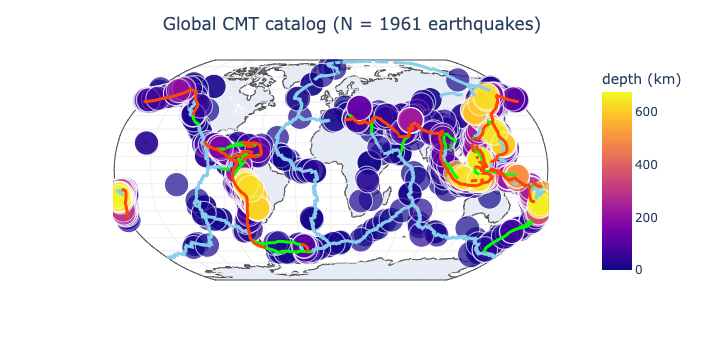

In [36]:
# Filter to improve readablility
Mw_min    = 6.5                               # Moment magnitude
Mw_max    = 10                                # Moment magnitude
depth_min = 0                                 # minimum depth in km
depth_max = 6400                              # maximum depth in km
datetime_min = '1000-01-01 00:00:00.000000'   # 'yyyy-mm-dd hh:mm:ss.SSSSSS'
datetime_max = '2050-01-01 00:00:00.000000'   # 'yyyy-mm-dd hh:mm:ss.SSSSSS'

# Don't change these two statements
mask = (cmt_cat['centroid.MW'] >= Mw_min) & (cmt_cat['centroid.MW'] <= Mw_max) & (cmt_cat['ep.depth'] >= depth_min) & (cmt_cat['ep.depth'] <= depth_max) & (cmt_cat['ep.timestamp'] >= datetime_min) & (cmt_cat['ep.timestamp'] <= datetime_max)
plot_earthquake_map(cmt_cat[mask])

### TO DO

**Question 6.** Examine the regions on and around Earth’s ocean ridges and ocean trenches. Both the spatial distribution and the depths of earthquakes associated with each are different.  Describe/illustrate these differences between earthquake associated with ridges and earthquakes associated with trenches.

**Answer**:

<p style="color:red;">Earthquakes along mid-ocean ridge earthquakes are always shallow, 0-35 km on (in reality most are 10km or less) and are distributed symmetrically on or very close to the ridge and transform segments. In contrast, trenches have a characteristic asymmetric pattern, with earthquakes shallow close to the trench, then systematically deepening (up to 800 km) for several hundred km on one side of the trench. </p>

**Question 7**. Using earthquake depths as evidence, discuss whether the Earth’s lithosphere is thicker at ridges or at trenches.

**Answer**:

<p style="color:red;"> Earthquakes occur in the lithosphere.  So the lack of earthquakes deeper than 35 km along mid-ocean ridges indicates that the lithosphere at ridges is relatively thin, especially when compared to the thicker lithosphere that must exist on one side of trenches where earthquakes can be hundreds of km deep. </p>

**Question 8**. Consider the belt of deepest earthquakes parallel to the Andes mountain chain (the 150-800km deep earthquakes). On what plate are these earthquakes? Explain.

**Answer**:

<p style="color:red"> The deepest earthquakes parallel to the Andes mountain chain are on the Nazca plate. From the map, they seem to be on the South American plate. However, the lithosphere is not that thick even at the thickest part. These earthquakes occur in the subducting slab that goes under the overriding plate. For the Andes mountain chain, the subducting slab is the Nazca plate. </p>

![Plates](Photos/Plates_tect2_en.svg.png)

----
## Part IV: Volcanism

A volcano is an opening in the Earth’s surface through which melted rock (magma), volcanic ash and/or gases escape from the interior of the Earth. Most of these are on land, but some are underwater (called “seamounts”).  Hovering on a particular volcano icon brings up an information box about that volcano. Hover over the dots in the interactive plot below to check out the *primary volcano type* (also see legend) and the last known eruption.

<ins>Mid-ocean ridge volcanism:</ins> While the volcano map below shows more than 1500 volcanoes, the vast majority of volcanic activity on Earth does not occur on land nor does it build volcanoes; instead it occurs at fissures underwater along the mid-ocean ridge system.

In [37]:
# Use encoding='cp1252' to avoid UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 87438: invalid start byte
# See https://stackoverflow.com/questions/29419322/unicodedecodeerror-utf8-codec-cant-decode-byte-0x92-in-position-377826-inva
volcanoes = pd.read_csv("Files/GVP_Volcano_List_Holocene.csv", encoding='cp1252')

# Dissplay the content of the dataframe
volcanoes[['Volcano Name', 'Primary Volcano Type', 'Last Known Eruption', 'Country', 'Tectonic Setting','Dominant Rock Type']]

Volcano Name Primary Volcano Type  \
0           West Eifel Volcanic Field                 Maar   
1                     Chaine des Puys            Lava dome   
2                 Olot Volcanic Field     Pyroclastic cone   
3            Calatrava Volcanic Field     Pyroclastic cone   
4                        Colli Albani              Caldera   
...                               ...                  ...   
1327                    Leskov Island        Stratovolcano   
1328                       Zavodovski        Stratovolcano   
1329              Protector Seamounts            Submarine   
1330  Mount Haddington Volcanic Field               Shield   
1331                         Melville        Stratovolcano   

     Last Known Eruption         Country  \
0               8300 BCE         Germany   
1               4040 BCE          France   
2                Unknown           Spain   
3               3600 BCE           Spain   
4                Unknown           Italy   
...                  ...             ...   
1327             Unknown  United Kingdom   
1328             2016 CE  United Kingdom   
1329             1962 CE  United Kingdom   
1330             Unknown      Antarctica   
1331             Unknown      Antarctica   

                                  Tectonic Setting  \
0           Rift zone / Continental crust (>25 km)   
1           Rift zone / Continental crust (>25 km)   
2          Intraplate / Continental crust (>25 km)   
3          Intraplate / Continental crust (>25 km)   
4     Subduction zone / Continental crust (>25 km)   
...                                            ...   
1327     Subduction zone / Oceanic crust (< 15 km)   
1328     Subduction zone / Oceanic crust (< 15 km)   
1329     Subduction zone / Oceanic crust (< 15 km)   
1330       Intraplate / Continental crust (>25 km)   
1331       Intraplate / Continental crust (>25 km)   

                    Dominant Rock Type  
0                              Foidite  
1                Basalt / Picro-Basalt  
2     Trachybasalt / Tephrite Basanite  
3                Basalt / Picro-Basalt  
4                              Foidite  
...                                ...  
1327      Andesite / Basaltic Andesite  
1328             Basalt / Picro-Basalt  
1329                          Rhyolite  
1330             Basalt / Picro-Basalt  
1331                               NaN  

[1332 rows x 6 columns]

/tmp/ipykernel_335290/2441878313.py:18: RuntimeWarning:

invalid value encountered in remainder



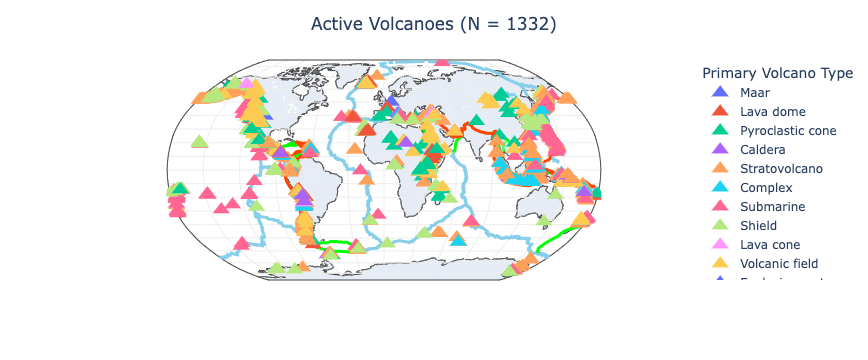

In [38]:
rlons, rlats = load_plate_boundaries('Files/ridge.json')
tlons, tlats = load_plate_boundaries('Files/transform.json')
hlons, hlats = load_plate_boundaries('Files/trench.json')
    
fig1 = px.scatter_geo(volcanoes, lon="Longitude", lat="Latitude", color='Primary Volcano Type', 
                 symbol_sequence=['triangle-up'],
                 labels={"Longitude":"longitude (degrees)", "Latitude":"latitude (degrees)","color":"Last Known Eruption (years before present)"}, 
                 hover_data=['Volcano Name', 'Primary Volcano Type', 'Last Known Eruption', 'Country', 'Tectonic Setting','Dominant Rock Type'])

fig1a = px.line_geo(lon=rlons, lat=rlats)
fig1a.update_traces(line={'color':'skyblue', 'width':3})
    
fig1b = px.line_geo(lon=tlons, lat=tlats)
fig1b.update_traces(line={'color':'lime', 'width':3})
    
fig1c = px.line_geo(lon=hlons, lat=hlats)
fig1c.update_traces(line={'color':'orangered', 'width':3})

fig = go.Figure(data=fig1a.data + fig1b.data + fig1c.data + fig1.data, layout = fig1.layout)

fig.update_xaxes(range=[-180, 180], tickvals=np.arange(-180,190,30))
fig.update_yaxes(range=[-90, 90], tickvals=np.arange(-90,100,15))
fig.update_traces(marker={'size': 15})
fig.update_geos(projection_type="robinson", lataxis_showgrid=True, lonaxis_showgrid=True)
fig.update_layout(title_text="Active Volcanoes (N = %d)"%len(volcanoes), title_x=0.5)
fig.show()

### TO DO

**Question 9**. You have seen that earthquakes are associated with plate boundaries, and we mention above that volcanism exists along the mid-ocean <u>ridges</u>.  What about volcanism associated with <u>trenches</u>?  Describe the spatial distribution of volcanoes associated with trenches and surrounding features (e.g. coastlines, island arcs, mountain ranges).

**Answer**:

<p style="color:red"> A chain of numerous volcanos on one side of the trench, ~100-300km from the trench.  When continental plate involved you get a volcanic mountain range (the Andes, the Cascades).  When only oceanic plates involved, you get a volcanic 
island arc (Pacific “Ring of Fire”.”) </p>